In [1]:
import os, os.path
import random
from PIL import Image
import numpy as np

In [2]:
DATA_DIR = 'data/'
# DATA_DIR = '../../00 Data/imgs/'
TRAIN_DIR = DATA_DIR + 'train/'
TEST_DIR = DATA_DIR + 'test/'
NUM_CLASSES = 10

In [3]:
def _get_training_class_path(driving_class: int = 0):
    """Gets the path to a specific class of the training images
    
    Args:
        driving_class (int): Class from 0 to 9 corresponding to the class of driving

    Returns:
        str: Path to the directory of images
    """
    if driving_class < 0 or driving_class > 9:
        return None
    class_folder_path = f'{TRAIN_DIR}c{driving_class}/'
    return class_folder_path

In [4]:
_get_training_class_path(2)

'data/train/c2/'

In [5]:
def _get_training_class_paths():
    """
    Returns:
        list[str]: List of paths to the training class directories.
    """
    return [_get_training_class_path(id) for id in range(NUM_CLASSES)]

In [6]:
_get_training_class_paths()

['data/train/c0/',
 'data/train/c1/',
 'data/train/c2/',
 'data/train/c3/',
 'data/train/c4/',
 'data/train/c5/',
 'data/train/c6/',
 'data/train/c7/',
 'data/train/c8/',
 'data/train/c9/']

In [7]:
def get_training_image_paths_by_class():
    return [[f'{c}{i}' for i in os.listdir(c)] for c in _get_training_class_paths()]

In [8]:
image_paths = get_training_image_paths_by_class()

In [9]:
def get_training_image_paths_flat():
    return [f'{c}{i}' for c in _get_training_class_paths() for i in os.listdir(c)]

In [10]:
image_paths_flat = get_training_image_paths_flat()

In [11]:
len(image_paths_flat)

22473

In [12]:
def get_test_image_path():
    """Gets the path to all test images

    Returns:
        str: Path to the directory
    """
    return TEST_DIR

In [13]:
def open_image_as_np(path_to_img: str):
    """
    Returns:
        np.array: Opened image
    """
    img = Image.open(path_to_img)
    img_as_np = np.asarray(img)
    return img_as_np

In [14]:
img1 = open_image_as_np(image_paths_flat[0])

In [15]:
img1.shape

(480, 640, 3)

In [16]:
def get_random_training_image():
    """Gets a random training image.

    Returns:
        np.array: The random image
    """
    all_image_paths = get_training_image_paths_flat()
    rand_path = random.choice(all_image_paths)
    return open_image_as_np(rand_path)

In [17]:
image = get_random_training_image()

In [18]:
def get_num_training_images():
    """
    Returns:
        int: Number of training images
    """
    return len(get_training_image_paths_flat())

In [19]:
def get_num_training_images():
    """
    Returns:
        int: Number of training images
    """
    return len(get_training_image_paths_flat())

In [20]:
get_num_training_images()

22473

In [21]:
def generate_training_batches(num_batches=200):
    """Divides training data into batches.

    Returns:
        list[list[int]]: Batched indices corresponding to images in training data.
    """
    num_images = get_num_training_images()
    image_paths = get_training_image_paths_flat()
    random.shuffle(image_paths)
    batch = np.linspace(0, num_images, num_batches+1, dtype=int)
    return [image_paths[batch[i]:batch[i+1]] for i in range(num_batches)]

In [22]:
batches = generate_training_batches()

In [23]:
batches[0][0]

'data/train/c0/img_38502.jpg'

In [24]:
a = batches[0][0]

In [26]:
def open_training_batch(batch):
    """Given a batch of paths, opens the whole batch of images and returns them.

    Returns:
        np.array[image]: Batch of images, shape (N x w x h x 3)
    """
    images = []
    for image_path in batch:

        img = open_image_as_np(image_path)

        images.append(img)

    images = np.array(images)

    return images


In [29]:
batches[0][0]

'data/train/c0/img_38502.jpg'

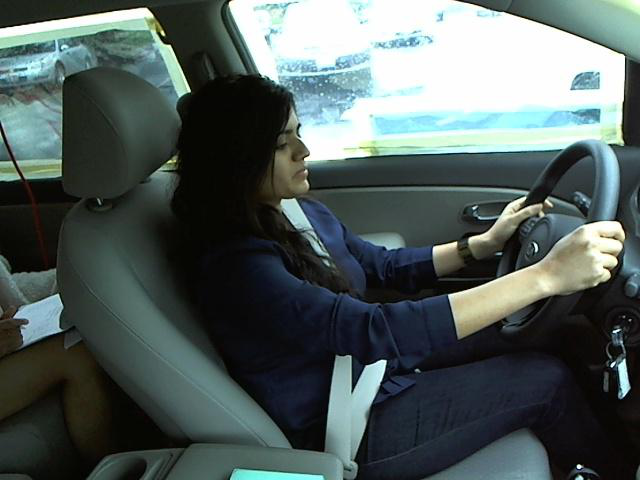

In [30]:
Image.open(batches[0][0])

In [31]:
#from data_preparation.DimensionalityReducer import *
from DimensionalityReducer import *
from DataHelpers import *

import numpy as np
from sklearn import decomposition

class Sklearn_PCA(DimensionalityReducer):
    def __init__(self, n_components):
        """
        Args: 
            data: NxD array, where each image is flattened into a 1-Dimensional vector
            n_components (int): Number of components/features for PCA to reduce to
        """
        self.n_components = n_components

    def get_reduced_data(self, data):
        """Performs PCA on the data.
        Sklean's PCA assumes the data is size NxD, where N is the number of images,
        and D is the dimension of the *flattened* image.
        """
        num_images = data.shape[0]
        data = np.reshape(data, (num_images, -1))
        pca = decomposition.PCA(self.n_components)
        pca.fit(data)
        return pca.transform(data)


In [32]:
pca = Sklearn_PCA(3)

In [33]:
pca_reduced = pca.get_reduced_data(img1)

In [34]:
pca_reduced.shape

(480, 3)

In [35]:
import sys
sys.path.append('../')

from analysis.Visualization import *

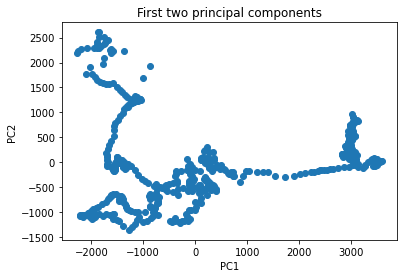

In [36]:
PCAplot2d(pca_reduced)

In [155]:
from data_preparation.FeatureExtractor import *

import numpy as np
from skimage.feature import hog

class HOG(FeatureExtractor):
    def __init__(self, orientations=8, pixels_per_cell=(16,16)):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell

    def get_features(self, data):
        features = []
        hog_images = []
        
        for image in data:

            flattened_hog = hog(image, self.orientations,self.pixels_per_cell,
                                cells_per_block=(1, 1), visualize=True,channel_axis=-1)

            features.append(flattened_hog[0])
            hog_images.append(flattened_hog[1])
    
        return (np.array(features),np.array(hog_images))


In [92]:
batch1 = open_training_batch(batches[0])[:2]

In [93]:
batch1.shape

(2, 480, 640, 3)

In [156]:
test1 = HOG()

In [157]:
ret = test1.get_features(batch1)

In [158]:
a,b = ret

In [159]:
a.shape

(2, 9600)

In [160]:
b.shape

(2, 480, 640)

In [161]:

def HOGplot(data,hog,n=3):
    '''
    Args:
        data: N x H x W x D (N images before processed by HOG.py)
        
        hog: output of HOG.py, which is a tuple of three numpy arrays: (extracted_features, images_before_hog, images_after_hog)
        
        n: number of image comparisons - by default you will get at most 3 pairs of before and after images
    
    Returns:
        images comparison before and after HOG
    
    '''
    
    _,h = hog
    
    N = data.shape[0]
    
    if N <= n:
        n = N

    for i in range(n):
    
        orig_image = data[i]
  
        hog_image = h[i]
      

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

        ax1.axis('off')
        ax1.imshow(orig_image, cmap=plt.cm.gray)
        ax1.set_title('Input image')

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Histogram of Oriented Gradients')
        plt.show()

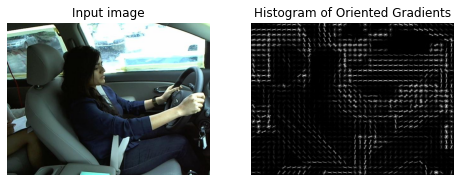

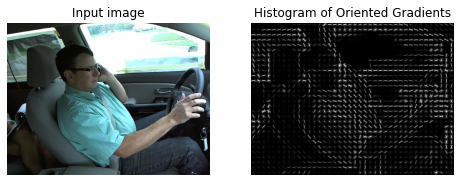

In [162]:
HOGplot(batch1,ret)

(480, 640, 3)
(480, 640)


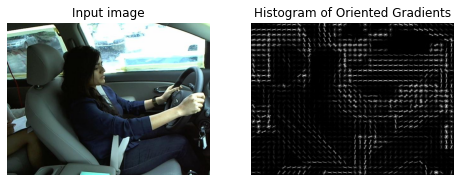

(480, 640, 3)
(480, 640)


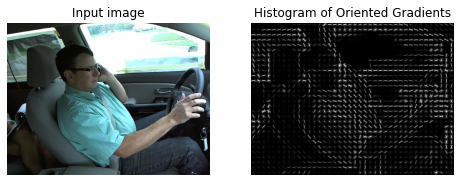

In [153]:
n = a.shape[0]

for i in range(n):
    
    orig_image = b[i]
    print(orig_image.shape)
    hog_image = c[i]
    print(hog_image.shape)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(orig_image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

[0.39367295 0.0725938  0.39367295 ... 0.03473355 0.09151932 0.5220359 ]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(9600,)
(480, 640)


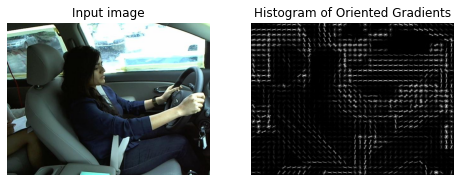

In [60]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = batch1[0]

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True,channel_axis=-1 )
print(fd)
print(hog_image)
print(fd.shape)
print(hog_image.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [48]:
import sklearn
print(sklearn.__version__)



1.0.2


In [49]:
import skimage

print(skimage.__version__)

0.19.2


In [51]:
batch1[0][0]

array([[ 27,  32,  25],
       [ 28,  33,  26],
       [ 28,  33,  26],
       ...,
       [255, 251, 255],
       [255, 250, 255],
       [255, 249, 255]], dtype=uint8)